In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

##Data collection and processing

In [4]:
#loading dataset into pandas dataframe
loan_dataset = pd.read_csv('/content/loan_prediction_data.csv')

In [5]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [7]:
#printing first five rows
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP100000,Male,No,1,Not_Graduate,Yes,22329,685,131,240,0.0,Urban,Y
1,LP100001,Female,Yes,2,Graduate,Yes,21414,7531,653,240,0.0,Rural,N
2,LP100002,Male,Yes,2,Not_Graduate,Yes,2786,4283,414,120,1.0,Urban,Y
3,LP100003,Male,No,3+,Graduate,No,17210,7736,212,240,1.0,Semiurban,Y
4,LP100004,Male,Yes,0,Not_Graduate,No,12871,7710,97,120,1.0,Semiurban,Y


In [8]:
loan_dataset.shape

(614, 13)

In [9]:
#stastical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,13327.736156,4836.517915,377.752443,231.400651,0.863192
std,6790.454504,2910.213966,191.734116,88.822232,0.343925
min,1516.000000,6.000000,50.000000,120.000000,0.000000
25%,7411.750000,2127.750000,210.250000,180.000000,1.000000
50%,12959.000000,4914.000000,376.000000,240.000000,1.000000
75%,19002.000000,7179.000000,553.000000,360.000000,1.000000
max,24986.000000,9984.000000,699.000000,360.000000,1.000000


In [10]:
#number of missing values in each column
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


lable encoding

In [11]:
#labelencoding
loan_dataset.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

<ipython-input-11-014d18b6666d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)


this will replace the Y with 1 and N with 0 in loan_status column


In [12]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP100000,Male,No,1,Not_Graduate,Yes,22329,685,131,240,0.0,Urban,1
1,LP100001,Female,Yes,2,Graduate,Yes,21414,7531,653,240,0.0,Rural,0
2,LP100002,Male,Yes,2,Not_Graduate,Yes,2786,4283,414,120,1.0,Urban,1
3,LP100003,Male,No,3+,Graduate,No,17210,7736,212,240,1.0,Semiurban,1
4,LP100004,Male,Yes,0,Not_Graduate,No,12871,7710,97,120,1.0,Semiurban,1


In [13]:
#dependent column values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
2,167
1,156
0,149
3+,142


In [14]:
#replacing the values of 3+ TO 4
loan_dataset = loan_dataset.replace(to_replace='3+', value = 4)

In [15]:
#dependent values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
2,167
1,156
0,149
4,142


##data visualisation

<Axes: xlabel='Education', ylabel='count'>

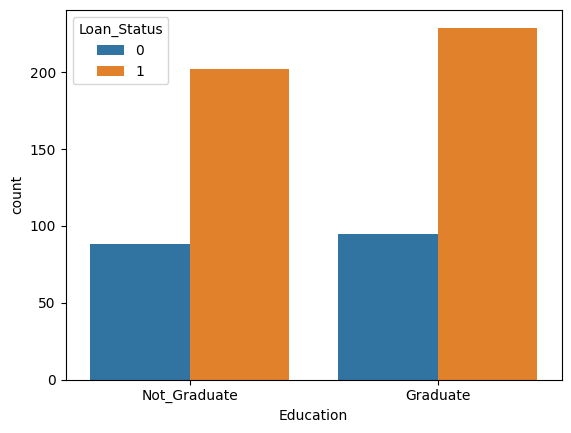

In [17]:
#education and loan status
sns.countplot(x='Education', hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

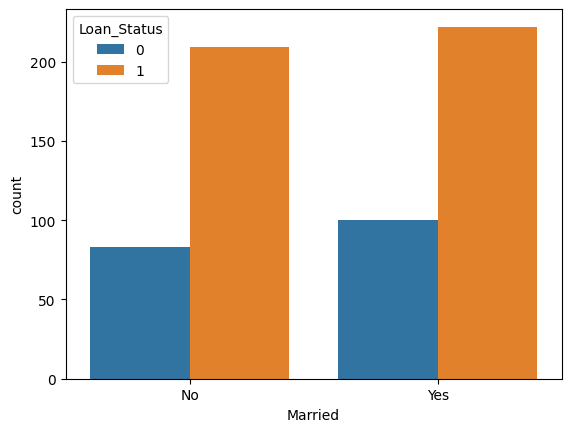

In [18]:
# martial status & loan status
sns.countplot(x='Married',hue='Loan_Status', data=loan_dataset)

In [27]:
#convert categorical column to numerical values
loan_dataset.replace({'Married':{'No': 0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not_Graduate':0}},inplace=True)

<ipython-input-27-e35861f9ae50>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Married':{'No': 0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},


now all the columns turn into numerical value

In [28]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP100000,1,0,1,0,1,22329,685,131,240,0.0,2,1
1,LP100001,0,1,2,1,1,21414,7531,653,240,0.0,0,0
2,LP100002,1,1,2,0,1,2786,4283,414,120,1.0,2,1
3,LP100003,1,0,4,1,0,17210,7736,212,240,1.0,1,1
4,LP100004,1,1,0,0,0,12871,7710,97,120,1.0,1,1


In [31]:
#separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [32]:
print(X)
print(Y)

     Gender  Married  ... Credit_History  Property_Area
0         1        0  ...            0.0              2
1         0        1  ...            0.0              0
2         1        1  ...            1.0              2
3         1        0  ...            1.0              1
4         1        1  ...            1.0              1
..      ...      ...  ...            ...            ...
609       0        1  ...            1.0              2
610       1        1  ...            1.0              0
611       0        0  ...            1.0              0
612       0        1  ...            1.0              2
613       0        0  ...            1.0              2

[614 rows x 11 columns]
0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    1
Name: Loan_Status, Length: 614, dtype: int64


train test split

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = 0.1,random_state=2,stratify=Y)

In [34]:
print(X.shape,X_train.shape,X_test.shape)

(614, 11) (552, 11) (62, 11)


##training the model
***support vector machine model***

In [25]:
classifier = svm.SVC(kernel='linear')

training the svm model


In [35]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

##model evaluation


In [36]:
#accuracy score on trainig data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [37]:
print('Accuracy on training data : ' ,training_data_accuracy)

Accuracy on training data :  0.6938405797101449


In [40]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [41]:
print('Accuracy on test data :', test_data_accuracy)

Accuracy on test data : 0.6935483870967742


##making a predictive system


In [43]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP100000,1,0,1,0,1,22329,685,131,240,0.0,2,1
1,LP100001,0,1,2,1,1,21414,7531,653,240,0.0,0,0
2,LP100002,1,1,2,0,1,2786,4283,414,120,1.0,2,1
3,LP100003,1,0,4,1,0,17210,7736,212,240,1.0,1,1
4,LP100004,1,1,0,0,0,12871,7710,97,120,1.0,1,1


In [50]:
input_data = (1, 0, 1, 0,	1, 22329,	685, 131,	240, 0.0, 2)
input_data_asnp = np.asarray(input_data)
input_data_reshaped = input_data_asnp.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==1):
  print("loan status approved")

else :
  print("loan status not approved")


[1]
loan status approved


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
